# Feature Selection

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression, SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load cleaned data

In [22]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/kz_data_en_clean.csv')
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/student_portuguese_clean.csv')

In [23]:
print(f"Kazakhstan: {kz_data.shape}")
print(f"Foreign: {foreign_data.shape}")

Kazakhstan: (121, 125)
Foreign: (649, 74)


# Prepare Data for Feature Selection

In [24]:
def prepare_features_kz(df):
    """Prepare features and target"""
    # Separate features and target
    X = df.drop(['gpa'], axis=1) if 'gpa' in df.columns else df
    y = df['gpa'] if 'gpa' in df.columns else None
    
    # Select only numerical features for now
    numerical_cols = X.select_dtypes(include=[np.number]).columns
    X_numerical = X[numerical_cols]
    
    # Handle any remaining NaN
    X_numerical = X_numerical.fillna(X_numerical.median())
    
    return X_numerical, y, numerical_cols

def prepare_features_foreign(df):
    """Prepare features and target"""
    # Separate features and target
    X = df.drop(['final_grade'], axis=1) if 'final_grade' in df.columns else df
    y = df['final_grade'] if 'final_grade' in df.columns else None
    
    # Select only numerical features for now
    numerical_cols = X.select_dtypes(include=[np.number]).columns
    X_numerical = X[numerical_cols]
    
    # Handle any remaining NaN
    X_numerical = X_numerical.fillna(X_numerical.median())
    
    return X_numerical, y, numerical_cols

kz_X, kz_y, kz_feature_names = prepare_features_kz(kz_data)
foreign_X, foreign_y, foreign_feature_names = prepare_features_foreign(foreign_data)

print(f"\nKazakhstan features: {kz_X.shape}")
print(f"Foreign features: {foreign_X.shape}")



Kazakhstan features: (121, 10)
Foreign features: (649, 25)


# Mutual Information Score


=== Kazakhstan: Mutual Information ===
                              Feature  MI_Score
9                   financial_support  0.163094
76        financial_support_Partially  0.145135
83            study_hours_weekly_5-10  0.133454
7                    father_education  0.116483
15                     class_absences  0.115351
87               class_absences_Often  0.110841
12                 study_hours_weekly  0.104333
10                  emotional_support  0.098463
84              study_hours_weekly_<5  0.093976
64  living_situation_Rented apartment  0.092863
1                         course_year  0.089975
26                       peer_support  0.089972
71        father_education_Vocational  0.086542
2                                 age  0.075519
24                alcohol_consumption  0.066851


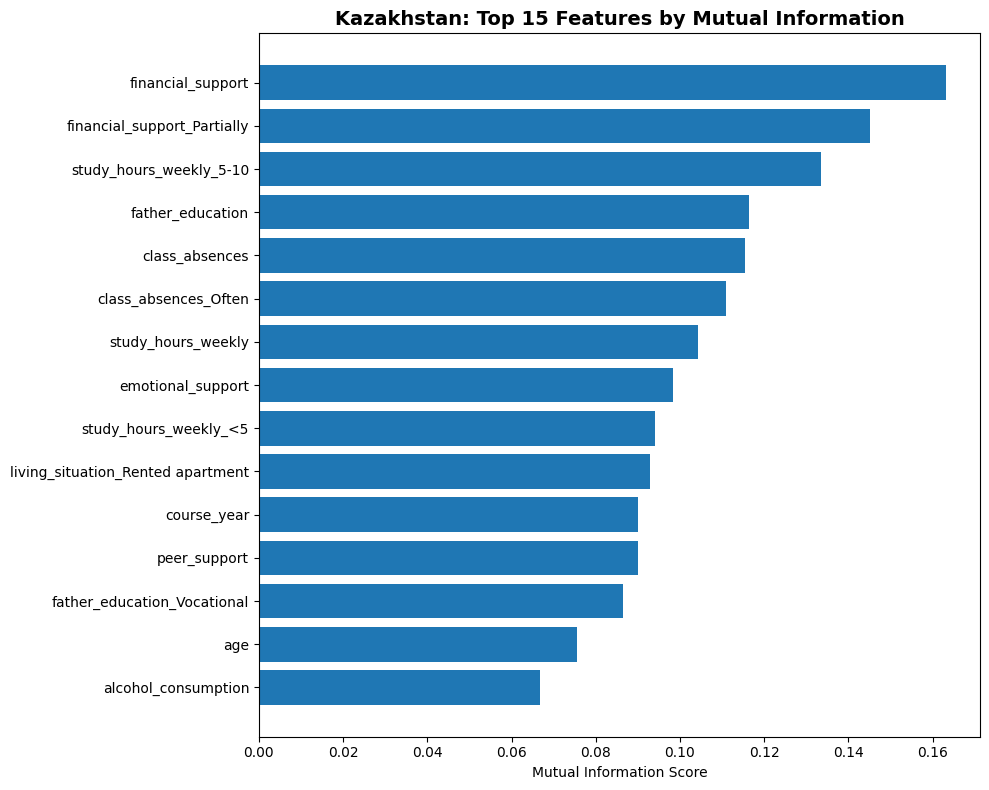


=== Foreign: Mutual Information ===
                                           Feature  MI_Score
32                                         grade_2  1.115256
31                                         grade_1  0.777484
0                                       student_id  0.211494
15                                  class_failures  0.108692
70                               higher_ed_encoded  0.098840
29                                          health  0.094210
28                                 weekend_alcohol  0.072514
54                       school_choice_reason_home  0.068816
8                                 father_education  0.062336
40  mother_education_primary education (4th grade)  0.062233
1                                           school  0.061950
21                                       higher_ed  0.059619
9                                       mother_job  0.054139
13                                     travel_time  0.047421
60                            travel_time_<15 mi

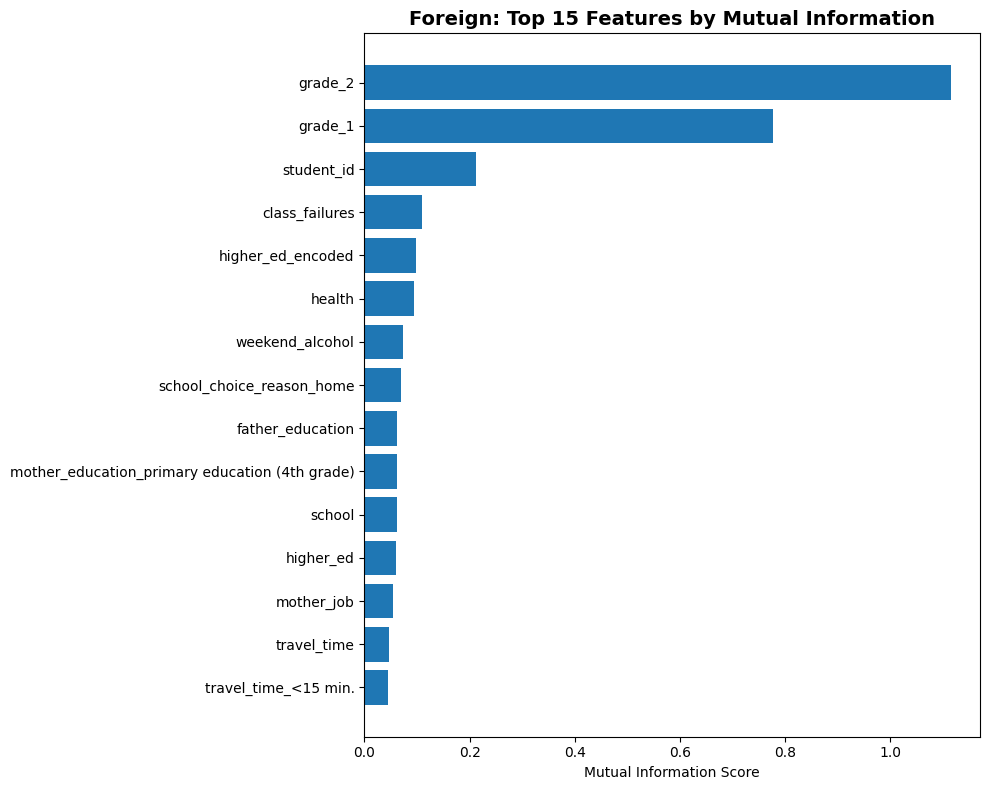

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

def calculate_mutual_info(X, y, feature_names, dataset_name):
    """Calculate mutual information scores with proper NaN handling and categorical encoding"""
    print(f"\n=== {dataset_name}: Mutual Information ===")
    
    X = X.copy()
    y = y.copy()
    
    # -------------------------
    # 1. Encode categorical features and fill NaN
    # -------------------------
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            X[col] = X[col].fillna(X[col].mean())
    
    # -------------------------
    # 2. Drop rows where y is NaN
    # -------------------------
    mask = ~y.isna()
    X_clean = X[mask]
    y_clean = y[mask]
    
    # -------------------------
    # 3. Проверка на оставшиеся NaN
    # -------------------------
    if X_clean.isna().sum().sum() > 0:
        print("Warning: X still contains NaN! Filling with 0")
        X_clean = X_clean.fillna(0)
    
    # -------------------------
    # 4. Calculate MI
    # -------------------------
    mi_scores = mutual_info_regression(X_clean, y_clean, random_state=42)
    
    # -------------------------
    # 5. Create dataframe
    # -------------------------
    mi_df = pd.DataFrame({
        'Feature': feature_names,
        'MI_Score': mi_scores
    }).sort_values('MI_Score', ascending=False)
    
    print(mi_df.head(15))
    
    # -------------------------
    # 6. Visualize top 15
    # -------------------------
    plt.figure(figsize=(10, 8))
    plt.barh(mi_df['Feature'].head(15), mi_df['MI_Score'].head(15))
    plt.xlabel('Mutual Information Score')
    plt.title(f'{dataset_name}: Top 15 Features by Mutual Information', 
              fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return mi_df

    return mi_df

# -------------------------
# Kazakhstan
# -------------------------
kz_y = kz_data['gpa'].copy()
kz_X = kz_data.drop(columns=['gpa'])  # все признаки кроме целевого
kz_feature_names = kz_X.columns.tolist()

kz_mi = calculate_mutual_info(kz_X, kz_y, kz_feature_names, "Kazakhstan")

# -------------------------
# Foreign
# -------------------------
foreign_y = foreign_data['final_grade'].copy()
foreign_X = foreign_data.drop(columns=['final_grade'])
foreign_feature_names = foreign_X.columns.tolist()

foreign_mi = calculate_mutual_info(foreign_X, foreign_y, foreign_feature_names, "Foreign")


In [9]:
print(kz_y.head())
print(type(kz_y))

0    3.00
1    3.93
2    2.70
3    2.00
4    2.99
Name: gpa, dtype: float64
<class 'pandas.core.series.Series'>


# Feature Importance using Random Forest

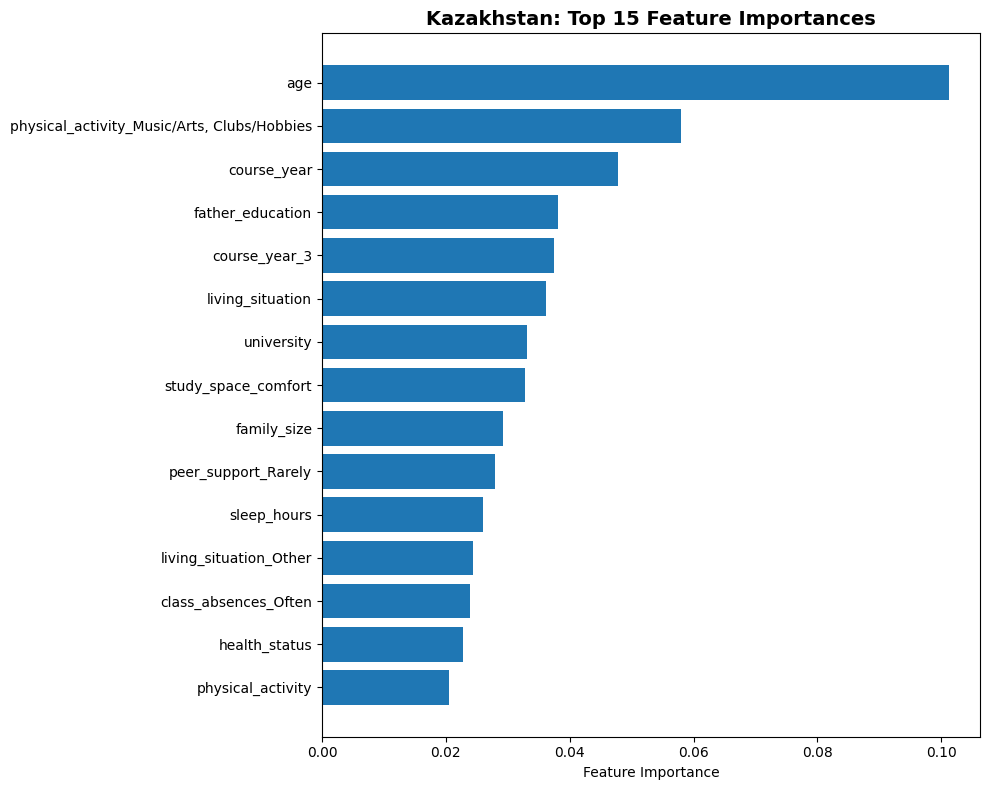

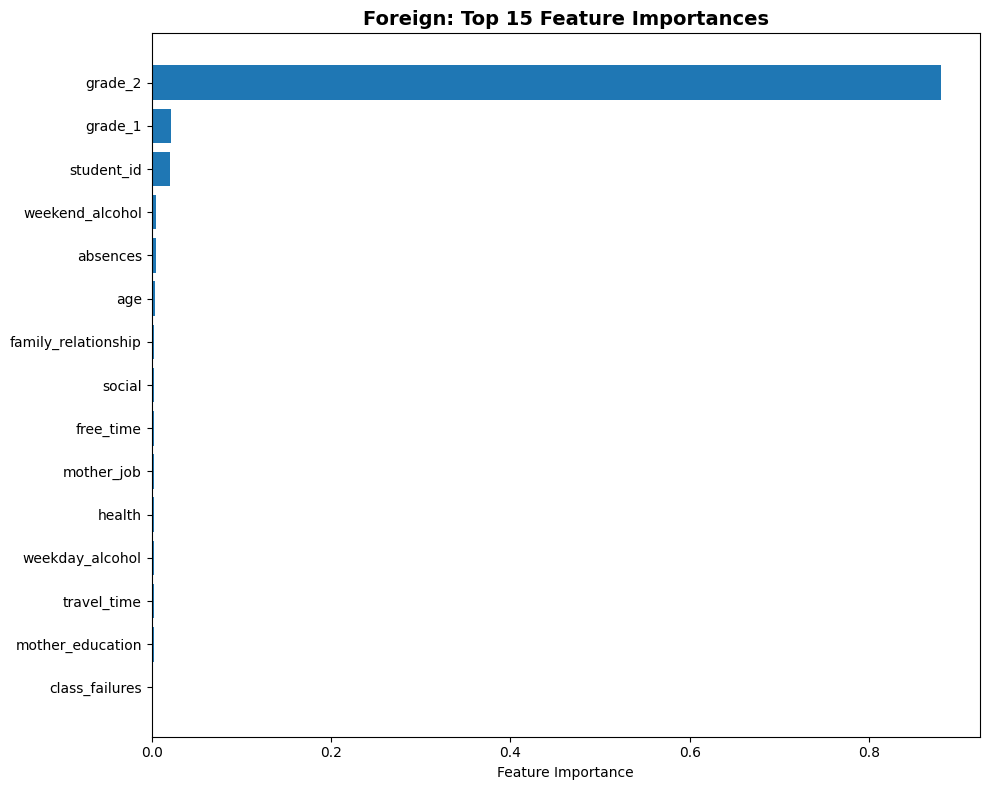

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

def calculate_rf_importance(X, y, feature_names, dataset_name):
    """Train Random Forest and get feature importances with categorical encoding"""
    X = X.copy()
    y = y.copy()
    
    # -------------------------
    # 1. Encode categorical features
    # -------------------------
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            X[col] = X[col].fillna(X[col].mean())  # числовые NaN
    
    # -------------------------
    # 2. Drop rows where y is NaN
    # -------------------------
    mask = ~y.isna()
    X_clean = X[mask]
    y_clean = y[mask]
    
    # -------------------------
    # 3. Train Random Forest
    # -------------------------
    rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_clean, y_clean)
    
    # -------------------------
    # 4. Feature importances
    # -------------------------
    importances = rf.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # -------------------------
    # 5. Plot top 15 features
    # -------------------------
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
    plt.xlabel('Feature Importance')
    plt.title(f'{dataset_name}: Top 15 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return importance_df, rf

# -------------------------
# Kazakhstan
# -------------------------
kz_y = kz_data['gpa'].copy()
kz_X = kz_data.drop(columns=['gpa'])
kz_feature_names = kz_X.columns.tolist()

kz_rf_imp, kz_rf_model = calculate_rf_importance(kz_X, kz_y, kz_feature_names, "Kazakhstan")

# -------------------------
# Foreign
# -------------------------
foreign_y = foreign_data['final_grade'].copy()
foreign_X = foreign_data.drop(columns=['final_grade'])
foreign_feature_names = foreign_X.columns.tolist()

foreign_rf_imp, foreign_rf_model = calculate_rf_importance(foreign_X, foreign_y, foreign_feature_names, "Foreign")



# F-statistic (ANOVA F-value)

In [35]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def calculate_f_scores(X, y, feature_names, dataset_name):
    """Calculate F-scores for regression with full NaN handling and categorical encoding"""
    print(f"\n=== {dataset_name}: F-scores ===")
    
    X = X.copy()
    y = y.copy()
    
    # -------------------------
    # Encode categorical features and fill NaN
    # -------------------------
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            # Заполняем NaN средним, если среднее NaN (все значения пустые) → 0
            mean_val = X[col].mean()
            if pd.isna(mean_val):
                mean_val = 0
            X[col] = X[col].fillna(mean_val)
    
    # -------------------------
    # Drop rows where y is NaN
    # -------------------------
    mask = ~y.isna()
    X_clean = X[mask]
    y_clean = y[mask]
    
    # -------------------------
    # Проверка оставшихся NaN
    # -------------------------
    if X_clean.isna().sum().sum() > 0:
        print("Warning: X still contains NaN! Filling with 0")
        X_clean = X_clean.fillna(0)
    
    # -------------------------
    # Calculate F-scores
    # -------------------------
    f_scores, p_values = f_regression(X_clean, y_clean)
    
    # -------------------------
    # Create dataframe
    # -------------------------
    f_df = pd.DataFrame({
        'Feature': feature_names,
        'F_Score': f_scores,
        'P_Value': p_values
    }).sort_values('F_Score', ascending=False)
    
    print(f_df.head(15))
    
    return f_df


# -------------------------
# Kazakhstan
# -------------------------
kz_y = kz_data['gpa'].copy()
kz_X = kz_data.drop(columns=['gpa'])
kz_feature_names = kz_X.columns.tolist()

kz_f_scores = calculate_f_scores(kz_X, kz_y, kz_feature_names, "Kazakhstan")

# -------------------------
# Foreign
# -------------------------
foreign_y = foreign_data['final_grade'].copy()
foreign_X = foreign_data.drop(columns=['final_grade'])
foreign_feature_names = foreign_X.columns.tolist()

foreign_f_scores = calculate_f_scores(foreign_X, foreign_y, foreign_feature_names, "Foreign")




=== Kazakhstan: F-scores ===
                                             Feature   F_Score   P_Value
1                                        course_year  7.354735  0.007680
59                                     course_year_4  7.034128  0.009087
96       physical_activity_Music/Arts, Clubs/Hobbies  6.746368  0.010579
83                           study_hours_weekly_5-10  6.034131  0.015475
120                              peer_support_Rarely  5.403919  0.021787
58                                     course_year_3  4.809429  0.030249
43                                    university_Sdu  4.540917  0.035152
56   university_Медицинский университет Астана (МУА)  4.499748  0.035975
87                              class_absences_Often  2.715897  0.101991
113                                   sleep_hours_>8  2.645023  0.106520
66                         mother_education_Masters+  2.322587  0.130161
4                                   living_situation  2.189783  0.141571
67                   

# Correlation-based Selection


=== Kazakhstan: Correlation-based Selection ===
Features with |correlation| > 0.1:
                                             Feature  Abs_Correlation
1                                        course_year         0.241261
59                                     course_year_4         0.236244
96       physical_activity_Music/Arts, Clubs/Hobbies         0.231626
83                           study_hours_weekly_5-10         0.219681
120                              peer_support_Rarely         0.208419
58                                     course_year_3         0.197092
43                                    university_Sdu         0.191720
56   university_Медицинский университет Астана (МУА)         0.190880
87                              class_absences_Often         0.149377
113                                   sleep_hours_>8         0.147458
66                         mother_education_Masters+         0.138361
4                                   living_situation         0.134421
67    

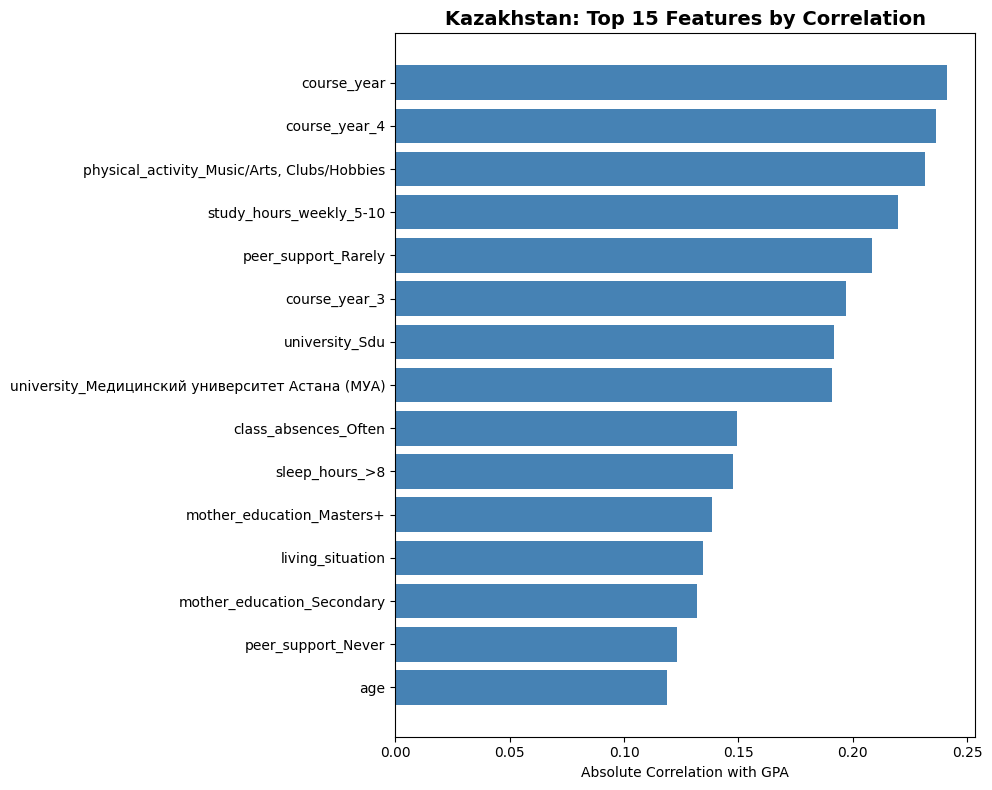


=== Foreign: Correlation-based Selection ===
Features with |correlation| > 0.1:
                                           Feature  Abs_Correlation
32                                         grade_2         0.897500
31                                         grade_1         0.867098
15                                  class_failures         0.387180
21                                       higher_ed         0.345708
70                               higher_ed_encoded         0.345708
33                                  school_encoded         0.279203
1                                           school         0.279203
38               mother_education_higher education         0.257082
63                             study_time_<2 hours         0.249330
40  mother_education_primary education (4th grade)         0.215089
27                                 weekday_alcohol         0.209233
44  father_education_primary education (4th grade)         0.195402
9                                  

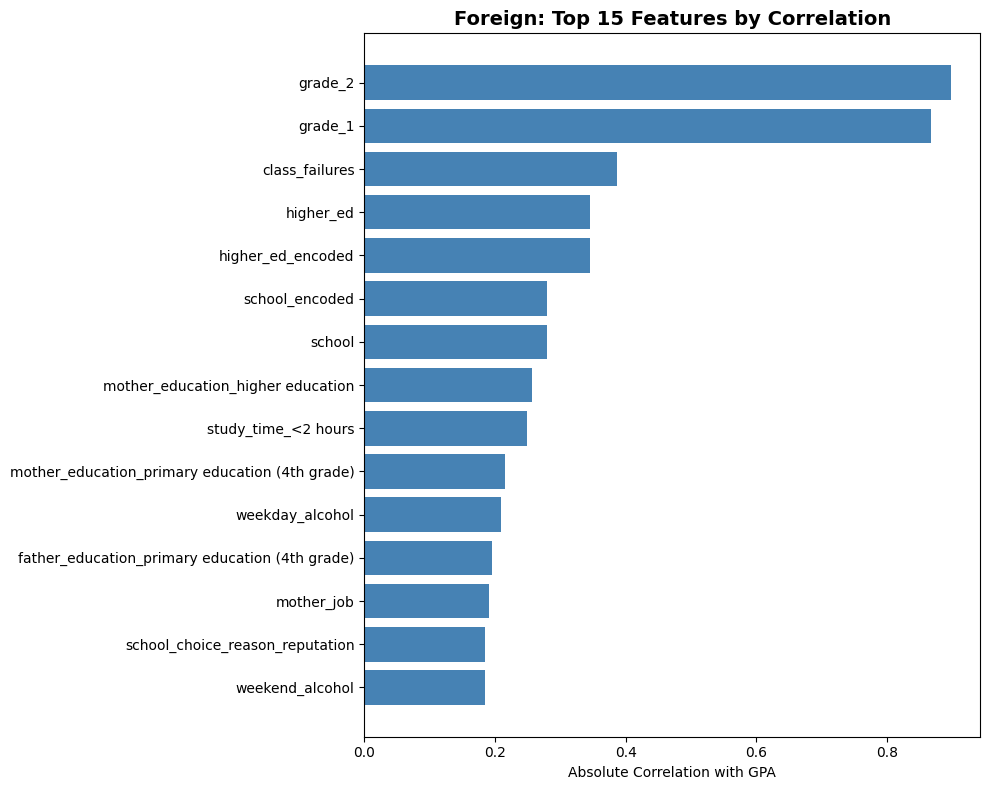

In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def select_by_correlation(X, y, feature_names, dataset_name, threshold=0.1):
    """Select features by correlation with target with categorical encoding and NaN handling"""
    print(f"\n=== {dataset_name}: Correlation-based Selection ===")
    
    X = X.copy()
    y = y.copy()
    
    # Encode categorical features and fill NaN
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            mean_val = X[col].mean()
            if pd.isna(mean_val):
                mean_val = 0
            X[col] = X[col].fillna(mean_val)
    
    # Drop rows where y is NaN
    mask = ~y.isna()
    X_clean = X[mask]
    y_clean = y[mask]
    
    # Calculate correlations
    correlations = []
    for col in feature_names:
        corr = np.corrcoef(X_clean[col], y_clean)[0, 1]
        correlations.append(abs(corr))
    
    # Create dataframe
    corr_df = pd.DataFrame({
        'Feature': feature_names,
        'Abs_Correlation': correlations
    }).sort_values('Abs_Correlation', ascending=False)
    
    print(f"Features with |correlation| > {threshold}:")
    selected = corr_df[corr_df['Abs_Correlation'] > threshold]
    print(selected)
    
    # Visualize top 15
    plt.figure(figsize=(10, 8))
    plt.barh(corr_df['Feature'].head(15), corr_df['Abs_Correlation'].head(15), color='steelblue')
    plt.xlabel('Absolute Correlation with GPA')
    plt.title(f'{dataset_name}: Top 15 Features by Correlation', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return corr_df


kz_corr = select_by_correlation(kz_X, kz_y, kz_feature_names, "Kazakhstan")
foreign_corr = select_by_correlation(foreign_X, foreign_y, 
                                      foreign_feature_names, "Foreign")

# PCA Analysis


=== Kazakhstan: PCA Analysis ===
Explained variance by component:
PC1: 0.0466 (Cumulative: 0.0466)
PC2: 0.0424 (Cumulative: 0.0890)
PC3: 0.0366 (Cumulative: 0.1256)
PC4: 0.0346 (Cumulative: 0.1602)
PC5: 0.0323 (Cumulative: 0.1926)
PC6: 0.0316 (Cumulative: 0.2242)
PC7: 0.0297 (Cumulative: 0.2538)
PC8: 0.0295 (Cumulative: 0.2833)
PC9: 0.0278 (Cumulative: 0.3111)
PC10: 0.0260 (Cumulative: 0.3371)


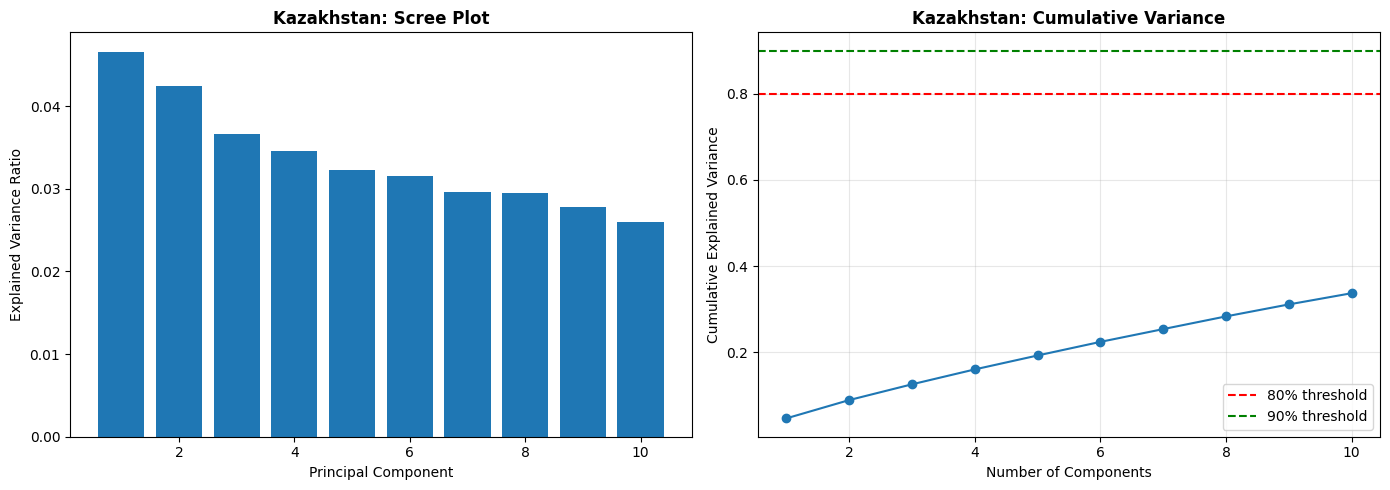


=== Foreign: PCA Analysis ===
Explained variance by component:
PC1: 0.0854 (Cumulative: 0.0854)
PC2: 0.0504 (Cumulative: 0.1358)
PC3: 0.0456 (Cumulative: 0.1814)
PC4: 0.0388 (Cumulative: 0.2202)
PC5: 0.0371 (Cumulative: 0.2573)
PC6: 0.0352 (Cumulative: 0.2925)
PC7: 0.0331 (Cumulative: 0.3255)
PC8: 0.0317 (Cumulative: 0.3572)
PC9: 0.0288 (Cumulative: 0.3860)
PC10: 0.0285 (Cumulative: 0.4145)


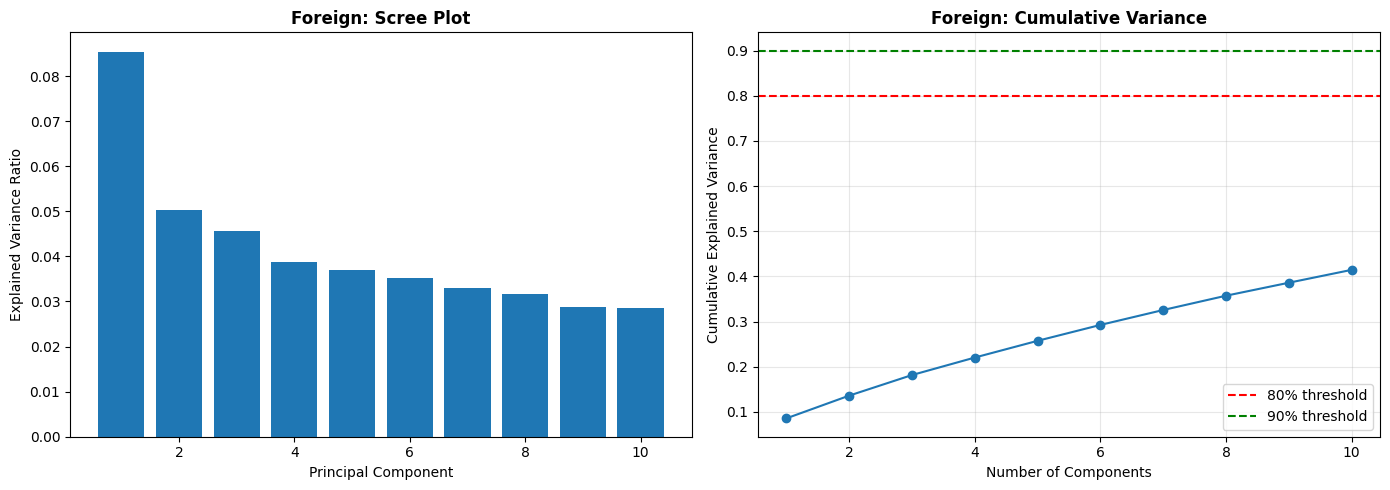

In [39]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def perform_pca(X, dataset_name, n_components=10):
    """Perform PCA analysis with categorical encoding and NaN handling"""
    print(f"\n=== {dataset_name}: PCA Analysis ===")
    
    X = X.copy()
    
    # Encode categorical features and fill NaN
    for col in X.columns:
        if X[col].dtype == 'object' or str(X[col].dtype) == 'category':
            X[col] = X[col].astype(str).fillna('missing')
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
        else:
            mean_val = X[col].mean()
            if np.isnan(mean_val):
                mean_val = 0
            X[col] = X[col].fillna(mean_val)
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Explained variance
    explained_var = pca.explained_variance_ratio_
    cumulative_var = np.cumsum(explained_var)
    
    print("Explained variance by component:")
    for i, (var, cum) in enumerate(zip(explained_var, cumulative_var)):
        print(f"PC{i+1}: {var:.4f} (Cumulative: {cum:.4f})")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Scree plot
    axes[0].bar(range(1, n_components+1), explained_var)
    axes[0].set_xlabel('Principal Component')
    axes[0].set_ylabel('Explained Variance Ratio')
    axes[0].set_title(f'{dataset_name}: Scree Plot', fontweight='bold')
    
    # Cumulative variance
    axes[1].plot(range(1, n_components+1), cumulative_var, marker='o')
    axes[1].axhline(y=0.8, color='r', linestyle='--', label='80% threshold')
    axes[1].axhline(y=0.9, color='g', linestyle='--', label='90% threshold')
    axes[1].set_xlabel('Number of Components')
    axes[1].set_ylabel('Cumulative Explained Variance')
    axes[1].set_title(f'{dataset_name}: Cumulative Variance', fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return pca, X_pca, explained_var


kz_pca, kz_X_pca, kz_explained_var = perform_pca(kz_X, "Kazakhstan")
foreign_pca, foreign_X_pca, foreign_explained_var = perform_pca(foreign_X, "Foreign")


# Combined Feature Ranking


=== Kazakhstan: Combined Feature Ranking ===

Top 15 Features (Combined Ranking):
                                        Feature   MI_Norm   RF_Norm  \
10                                  course_year  0.551674  0.471973   
13                                          age  0.463039  1.000000   
2                       study_hours_weekly_5-10  0.818264  0.023735   
57  physical_activity_Music/Arts, Clubs/Hobbies  0.069048  0.573240   
5                          class_absences_Often  0.679616  0.236433   
15                                course_year_4  0.399365  0.062455   
30                                course_year_3  0.195101  0.369587   
0                             financial_support  1.000000  0.056725   
21                             living_situation  0.326556  0.356756   
3                              father_education  0.714208  0.377104   
6                            study_hours_weekly  0.639711  0.152518   
86                          peer_support_Rarely  0.000000  0.2764

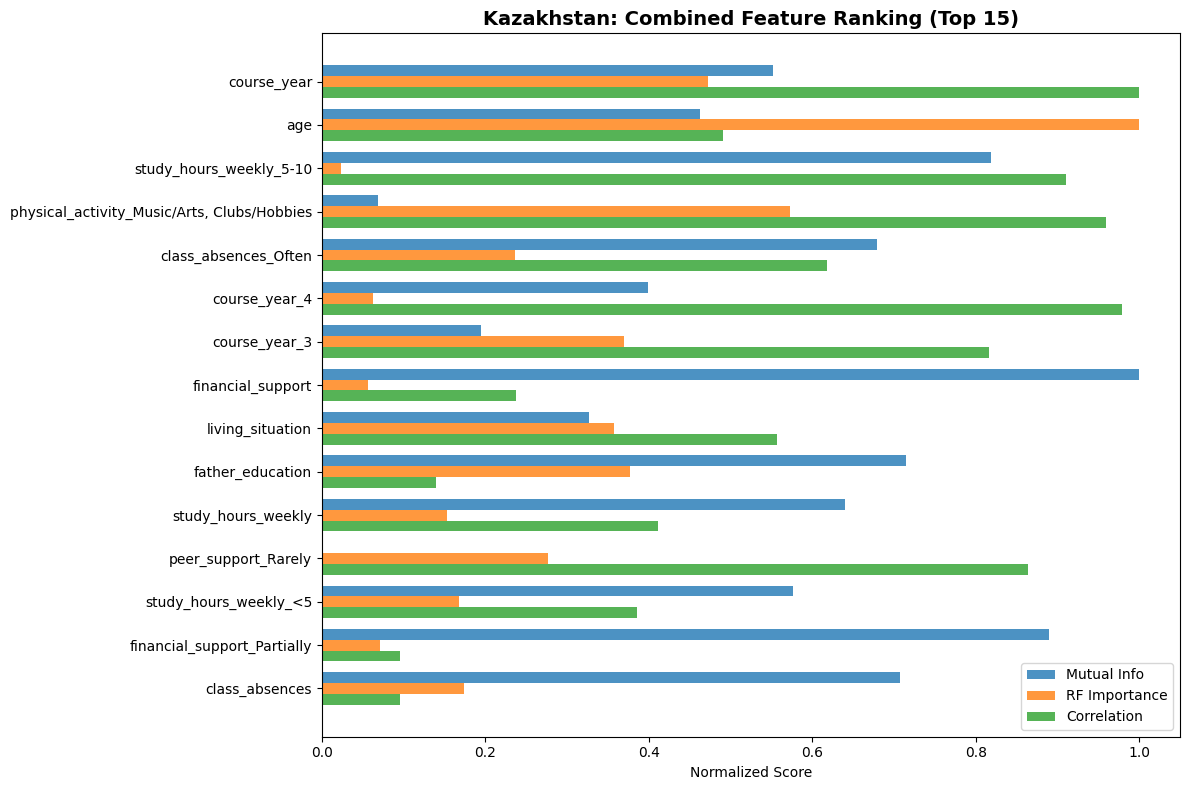


=== Foreign: Combined Feature Ranking ===

Top 15 Features (Combined Ranking):
                                           Feature   MI_Norm   RF_Norm  \
0                                          grade_2  1.000000  1.000000   
1                                          grade_1  0.697135  0.024283   
3                                   class_failures  0.097459  0.002117   
4                                higher_ed_encoded  0.088625  0.000153   
11                                       higher_ed  0.053458  0.000146   
2                                       student_id  0.189637  0.022763   
10                                          school  0.055548  0.000182   
20                                  school_encoded  0.034793  0.000421   
33               mother_education_higher education  0.021583  0.000654   
26                             study_time_<2 hours  0.028997  0.001298   
9   mother_education_primary education (4th grade)  0.055802  0.001568   
6                               

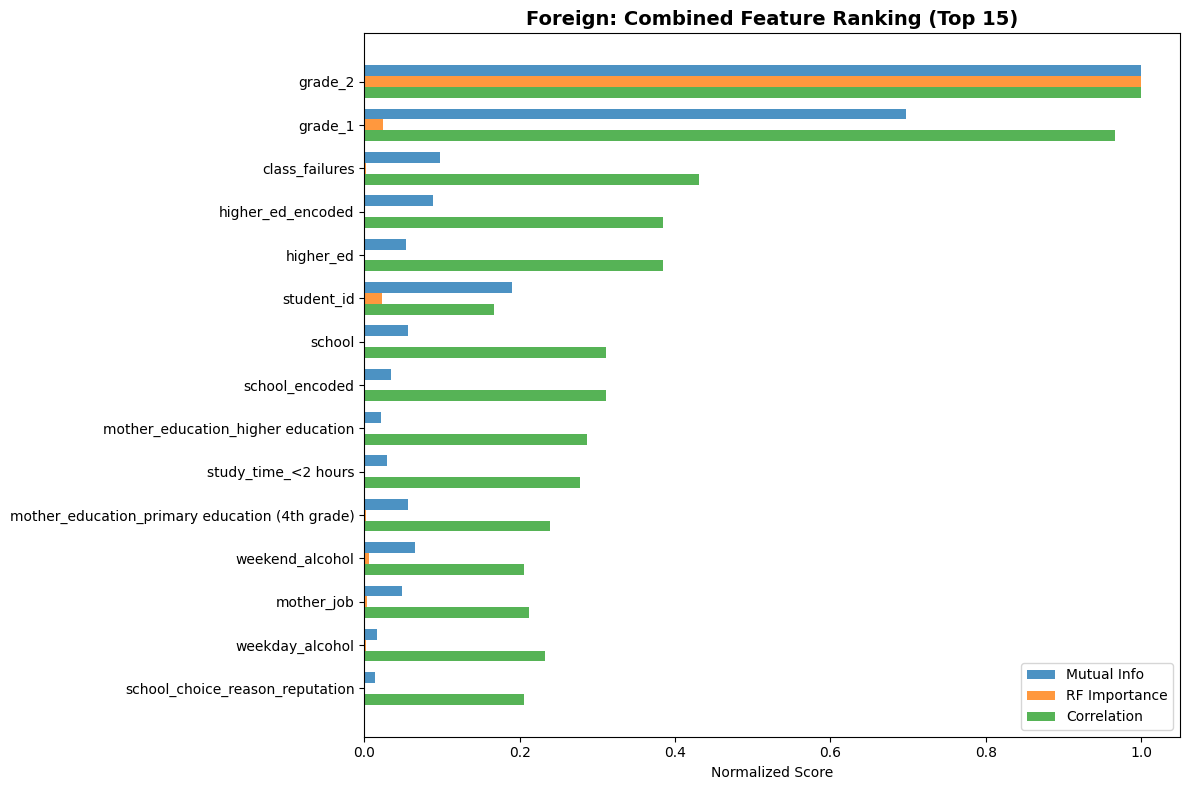

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt

def combine_feature_rankings(mi_df, rf_df, corr_df, dataset_name):
    """Combine different feature selection methods"""
    print(f"\n=== {dataset_name}: Combined Feature Ranking ===")
    
    # Normalize scores to 0-1
    mi_df['MI_Norm'] = (mi_df['MI_Score'] - mi_df['MI_Score'].min()) / \
                       (mi_df['MI_Score'].max() - mi_df['MI_Score'].min())
    
    rf_df['RF_Norm'] = (rf_df['Importance'] - rf_df['Importance'].min()) / \
                       (rf_df['Importance'].max() - rf_df['Importance'].min())
    
    corr_df['Corr_Norm'] = (corr_df['Abs_Correlation'] - corr_df['Abs_Correlation'].min()) / \
                           (corr_df['Abs_Correlation'].max() - corr_df['Abs_Correlation'].min())
    
    # Merge
    combined = mi_df[['Feature', 'MI_Norm']].merge(
        rf_df[['Feature', 'RF_Norm']], on='Feature'
    ).merge(
        corr_df[['Feature', 'Corr_Norm']], on='Feature'
    )
    
    # Calculate average score
    combined['Avg_Score'] = (combined['MI_Norm'] + 
                             combined['RF_Norm'] + 
                             combined['Corr_Norm']) / 3
    
    # Sort by average score
    combined = combined.sort_values('Avg_Score', ascending=False)
    
    print("\nTop 15 Features (Combined Ranking):")
    print(combined.head(15))
    
    # Visualize
    plt.figure(figsize=(12, 8))
    top_features = combined.head(15)
    x = np.arange(len(top_features))
    width = 0.25
    
    plt.barh(x - width, top_features['MI_Norm'], width, label='Mutual Info', alpha=0.8)
    plt.barh(x, top_features['RF_Norm'], width, label='RF Importance', alpha=0.8)
    plt.barh(x + width, top_features['Corr_Norm'], width, label='Correlation', alpha=0.8)
    
    plt.yticks(x, top_features['Feature'])
    plt.xlabel('Normalized Score')
    plt.title(f'{dataset_name}: Combined Feature Ranking (Top 15)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    # -------------------------
    # Создать папку, если не существует
    # -------------------------
    output_dir = '../results/figures'
    os.makedirs(output_dir, exist_ok=True)
    
    plt.savefig(f'{output_dir}/{dataset_name.lower()}_combined_ranking.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return combined

kz_combined = combine_feature_rankings(kz_mi, kz_rf_imp, kz_corr, "Kazakhstan")
foreign_combined = combine_feature_rankings(foreign_mi, foreign_rf_imp, 
                                            foreign_corr, "Foreign")

# Select Final Feature Set

In [42]:
def select_final_features(combined_df, top_n=15):
    """Select final feature set"""
    selected_features = combined_df.head(top_n)['Feature'].tolist()
    return selected_features

kz_selected_features = select_final_features(kz_combined, top_n=15)
foreign_selected_features = select_final_features(foreign_combined, top_n=15)

print("\n=== FINAL SELECTED FEATURES ===")
print("\nKazakhstan (Top 15):")
for i, feat in enumerate(kz_selected_features, 1):
    print(f"{i}. {feat}")

print("\nForeign (Top 15):")
for i, feat in enumerate(foreign_selected_features, 1):
    print(f"{i}. {feat}")


=== FINAL SELECTED FEATURES ===

Kazakhstan (Top 15):
1. course_year
2. age
3. study_hours_weekly_5-10
4. physical_activity_Music/Arts, Clubs/Hobbies
5. class_absences_Often
6. course_year_4
7. course_year_3
8. financial_support
9. living_situation
10. father_education
11. study_hours_weekly
12. peer_support_Rarely
13. study_hours_weekly_<5
14. financial_support_Partially
15. class_absences

Foreign (Top 15):
1. grade_2
2. grade_1
3. class_failures
4. higher_ed_encoded
5. higher_ed
6. student_id
7. school
8. school_encoded
9. mother_education_higher education
10. study_time_<2 hours
11. mother_education_primary education (4th grade)
12. weekend_alcohol
13. mother_job
14. weekday_alcohol
15. school_choice_reason_reputation


# Save Feature Selection Results

In [44]:
kz_combined.to_csv('/Users/kassi/Data Mining/Final/Code/report/feature/kz_feature_ranking.csv', index=False)
foreign_combined.to_csv('/Users/kassi/Data Mining/Final/Code/report/feature/foreign_feature_ranking.csv', index=False)

In [46]:
pd.DataFrame({'Feature': kz_selected_features}).to_csv(
    '/Users/kassi/Data Mining/Final/Code/report/feature/kz_selected_features.csv', index=False
)
pd.DataFrame({'Feature': foreign_selected_features}).to_csv(
    '/Users/kassi/Data Mining/Final/Code/report/feature/foreign_selected_features.csv', index=False
)

print("\nFeature selection results saved!")



Feature selection results saved!


# Prepare Data for Modeling

In [48]:
# Create datasets with selected features
kz_X_selected = kz_X[kz_selected_features]
foreign_X_selected = foreign_X[foreign_selected_features]

# Save for next notebooks
kz_modeling_data = pd.concat([kz_X_selected, kz_y], axis=1)
foreign_modeling_data = pd.concat([foreign_X_selected, foreign_y], axis=1)

kz_modeling_data.to_csv('/Users/kassi/Data Mining/Final/Code/data/model_ready/kz_modeling_ready.csv', index=False)
foreign_modeling_data.to_csv('/Users/kassi/Data Mining/Final/Code/data/model_ready/foreign_modeling_ready.csv', index=False)

print(f"\nModeling-ready data saved!")
print(f"Kazakhstan: {kz_modeling_data.shape}")
print(f"Foreign: {foreign_modeling_data.shape}")



Modeling-ready data saved!
Kazakhstan: (121, 16)
Foreign: (649, 16)


# Summary

In [49]:
summary = {
    'Method': ['Mutual Information', 'Random Forest', 'Correlation', 'Combined'],
    'Kazakhstan_Top_Feature': [
        kz_mi.iloc[0]['Feature'],
        kz_rf_imp.iloc[0]['Feature'],
        kz_corr.iloc[0]['Feature'],
        kz_combined.iloc[0]['Feature']
    ],
    'Foreign_Top_Feature': [
        foreign_mi.iloc[0]['Feature'],
        foreign_rf_imp.iloc[0]['Feature'],
        foreign_corr.iloc[0]['Feature'],
        foreign_combined.iloc[0]['Feature']
    ]
}

summary_df = pd.DataFrame(summary)
print("\nFeature Selection Summary:")
print(summary_df)


Feature Selection Summary:
               Method Kazakhstan_Top_Feature Foreign_Top_Feature
0  Mutual Information      financial_support             grade_2
1       Random Forest                    age             grade_2
2         Correlation            course_year             grade_2
3            Combined            course_year             grade_2
